In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('euro_exchange_rate.csv')
df.head()

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR,Unnamed: 42
0,2023-03-23,1.0879,142.87,1.9558,NaN,23.658,7.4482,NaN,0.88523,384.75,...,89.4810,1396.18,20.1915,4.8063,1.7373,59.125,1.4434,37.119,19.7787,NaN
1,2023-03-22,1.0785,143.13,1.9558,NaN,23.722,7.4472,NaN,0.87925,388.55,...,89.0800,1406.43,20.0036,4.8047,1.7362,58.683,1.4391,37.100,19.8529,NaN
2,2023-03-21,1.0776,142.63,1.9558,NaN,23.846,7.4465,NaN,0.88033,391.58,...,89.0308,1406.34,20.1454,4.8196,1.7412,58.485,1.4392,36.929,19.9659,NaN
3,2023-03-20,1.0717,140.77,1.9558,NaN,23.988,7.4450,NaN,0.87560,399.21,...,88.4900,1401.82,20.3003,4.8076,1.7106,58.281,1.4354,36.513,19.7861,NaN
4,2023-03-17,1.0623,140.57,1.9558,NaN,23.948,7.4450,NaN,0.87488,395.93,...,87.7870,1389.84,19.9829,4.7649,1.7014,58.118,1.4262,36.246,19.4988,NaN


set Date column as index of a dataframe 
Update index after sorting data-frame

Get the number of rows and columns

In [3]:
df.shape

(6206, 43)

Remove the last column "Unnamed: 42"

In [4]:
df=df.drop('Unnamed: 42', axis=1)
df.columns

Index(['Date', 'USD', 'JPY', 'BGN', 'CYP', 'CZK', 'DKK', 'EEK', 'GBP', 'HUF',
       'LTL', 'LVL', 'MTL', 'PLN', 'ROL', 'RON', 'SEK', 'SIT', 'SKK', 'CHF',
       'ISK', 'NOK', 'HRK', 'RUB', 'TRL', 'TRY', 'AUD', 'BRL', 'CAD', 'CNY',
       'HKD', 'IDR', 'ILS', 'INR', 'KRW', 'MXN', 'MYR', 'NZD', 'PHP', 'SGD',
       'THB', 'ZAR'],
      dtype='object')

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6206 non-null   object 
 1   USD     6206 non-null   float64
 2   JPY     6206 non-null   float64
 3   BGN     5808 non-null   float64
 4   CYP     2304 non-null   float64
 5   CZK     6206 non-null   float64
 6   DKK     6206 non-null   float64
 7   EEK     3074 non-null   float64
 8   GBP     6206 non-null   float64
 9   HUF     6206 non-null   float64
 10  LTL     4097 non-null   float64
 11  LVL     3842 non-null   float64
 12  MTL     2304 non-null   float64
 13  PLN     6206 non-null   float64
 14  ROL     1664 non-null   float64
 15  RON     4542 non-null   float64
 16  SEK     6206 non-null   float64
 17  SIT     2049 non-null   float64
 18  SKK     2560 non-null   float64
 19  CHF     6206 non-null   float64
 20  ISK     3865 non-null   float64
 21  NOK     6206 non-null   float64
 22  

It has 1 unique (Date column) and 41 data columns of different currencies. All data columns are in float values.

Change Date column data to date_time

In [6]:
df['Date']=pd.to_datetime(df['Date'])

Check the data type one more time.

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6206 non-null   datetime64[ns]
 1   USD     6206 non-null   float64       
 2   JPY     6206 non-null   float64       
 3   BGN     5808 non-null   float64       
 4   CYP     2304 non-null   float64       
 5   CZK     6206 non-null   float64       
 6   DKK     6206 non-null   float64       
 7   EEK     3074 non-null   float64       
 8   GBP     6206 non-null   float64       
 9   HUF     6206 non-null   float64       
 10  LTL     4097 non-null   float64       
 11  LVL     3842 non-null   float64       
 12  MTL     2304 non-null   float64       
 13  PLN     6206 non-null   float64       
 14  ROL     1664 non-null   float64       
 15  RON     4542 non-null   float64       
 16  SEK     6206 non-null   float64       
 17  SIT     2049 non-null   float64       
 18  SKK     

Process NaN values <br>
Count NaN values in every column

In [8]:
df.isnull().sum()

Date       0
USD        0
JPY        0
BGN      398
CYP     3902
CZK        0
DKK        0
EEK     3132
GBP        0
HUF        0
LTL     2109
LVL     2364
MTL     3902
PLN        0
ROL     4542
RON     1664
SEK        0
SIT     4157
SKK     3646
CHF        0
ISK     2341
NOK        0
HRK     1658
RUB     1873
TRL     4669
TRY     1537
AUD        0
BRL     2304
CAD        0
CNY     1599
HKD        0
IDR     1599
ILS     3074
INR     2560
KRW        0
MXN     2304
MYR     1599
NZD        0
PHP     1599
SGD        0
THB     1599
ZAR        0
dtype: int64

Find rows with only NaN values<br>
Print them by index (DateSeries) and delete these rows

In [9]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

In [10]:
print(rows_with_NaN)

           Date     USD     JPY     BGN      CYP     CZK     DKK      EEK  \
0    2023-03-23  1.0879  142.87  1.9558      NaN  23.658  7.4482      NaN   
1    2023-03-22  1.0785  143.13  1.9558      NaN  23.722  7.4472      NaN   
2    2023-03-21  1.0776  142.63  1.9558      NaN  23.846  7.4465      NaN   
3    2023-03-20  1.0717  140.77  1.9558      NaN  23.988  7.4450      NaN   
4    2023-03-17  1.0623  140.57  1.9558      NaN  23.948  7.4450      NaN   
...         ...     ...     ...     ...      ...     ...     ...      ...   
6201 1999-01-08  1.1659  130.09     NaN  0.58187  34.938  7.4433  15.6466   
6202 1999-01-07  1.1632  129.43     NaN  0.58187  34.886  7.4431  15.6466   
6203 1999-01-06  1.1743  131.42     NaN  0.58200  34.850  7.4452  15.6466   
6204 1999-01-05  1.1790  130.96     NaN  0.58230  34.917  7.4495  15.6466   
6205 1999-01-04  1.1789  133.73     NaN  0.58231  35.107  7.4501  15.6466   

          GBP     HUF  ...     ILS      INR      KRW      MXN     MYR     N

Choose 5 currencies

In [11]:
df5=df.loc[:,['Date','USD', 'JPY', 'GBP', 'AUD', 'CAD']]
df5.head()

,Date,USD,JPY,GBP,AUD,CAD
0,2023-03-23,1.0879,142.87,0.88523,1.6242,1.4875
1,2023-03-22,1.0785,143.13,0.87925,1.6132,1.4782
2,2023-03-21,1.0776,142.63,0.88033,1.6136,1.4726
3,2023-03-20,1.0717,140.77,0.87560,1.5978,1.4669
4,2023-03-17,1.0623,140.57,0.87488,1.5874,1.4584


In [12]:
df5.describe()

,USD,JPY,GBP,AUD,CAD
count,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000
mean,1.191688,127.753489,0.776309,1.576674,1.465535
std,0.158322,15.477305,0.099571,0.149233,0.097687
min,0.825200,89.300000,0.571100,1.163900,1.213900
25%,1.090300,117.180000,0.681013,1.481200,1.396800
50%,1.185850,128.855000,0.802075,1.595050,1.462700
75%,1.310525,136.167500,0.864073,1.668875,1.538775
max,1.599000,169.750000,0.978550,2.073500,1.812300


Change the structure of dataframe; one with currency and another with Value attribute

In [13]:
df5_melted=df5.melt(id_vars=["Date"], 
                   var_name="Currency",
                   value_name="Value"
                   )

In [14]:
df5_melted.head()

,Date,Currency,Value
0,2023-03-23,USD,1.0879
1,2023-03-22,USD,1.0785
2,2023-03-21,USD,1.0776
3,2023-03-20,USD,1.0717
4,2023-03-17,USD,1.0623


Plot the dataset

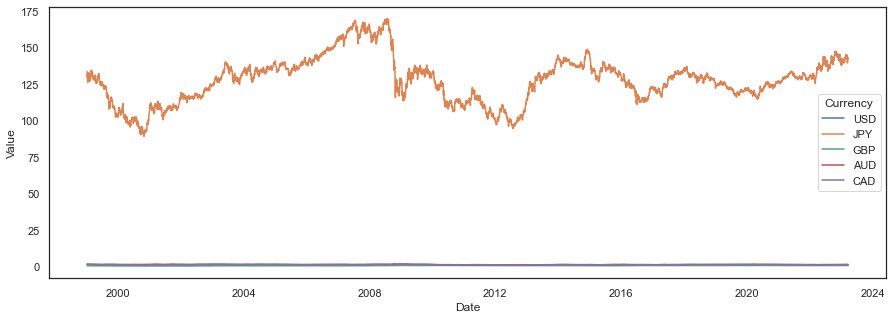

In [24]:
sns.set_style("white")
plt.figure(figsize=(15,5))
sns.lineplot(x="Date", y="Value", hue="Currency", palette='deep', data=df5_melted)

plt.show()

It seems JPY data high value pushed other data to the bottom, making it hard to analyze. <br>
Let's separate JPY data from the orignal dataframe to distinguish it from the rest of the dataset.

In [16]:
df5_melted_JPY=df5_melted.loc[df5_melted['Currency'] == "JPY"]
df5_melted_nonJPY=df5_melted.loc[df5_melted['Currency'] != "JPY"]

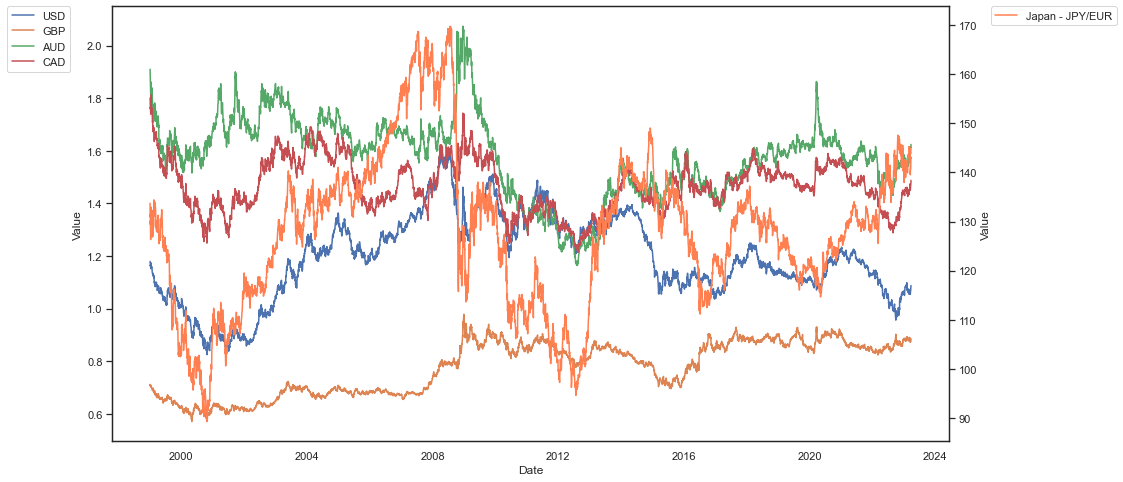

In [27]:
sns.set_style("white")
fig, ax1=plt.subplots(figsize=(15,8))
ax2 =ax1.twinx()

g=sns.lineplot(x="Date", y="Value", hue="Currency",ax=ax1,data=df5_melted_nonJPY)
g.legend(bbox_to_anchor=(-0.05, 1), loc=0, borderaxespad=0.)


g1=sns.lineplot(x="Date", y="Value", color="coral",label="Japan - JPY/EUR",ax=ax2,data=df5_melted_JPY)
g1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Based on this plot, it seems like JPY, USD had experiened a large spike during year 2008-2010.

In [18]:
df5_melted_USD=df5_melted.loc[df5_melted['Currency'] == "USD"]
df5_melted_GBP=df5_melted.loc[df5_melted['Currency'] == "GBP"]
df5_melted_AUD=df5_melted.loc[df5_melted['Currency'] == "AUD"]
df5_melted_CAD=df5_melted.loc[df5_melted['Currency'] == "CAD"]

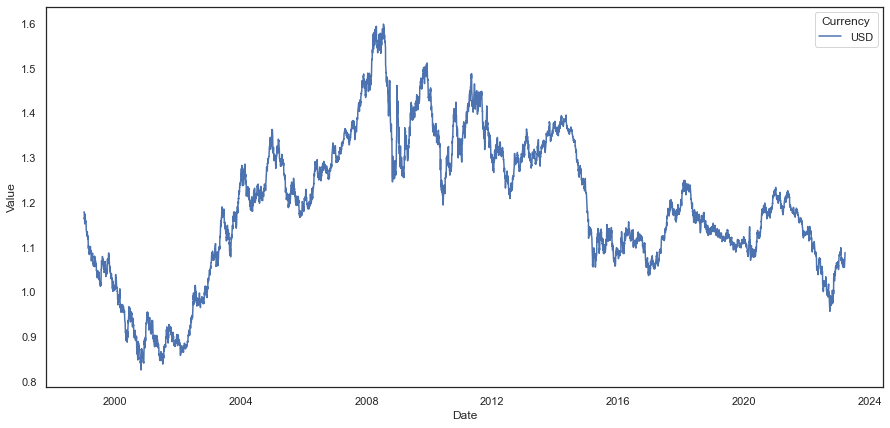

In [19]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Value", hue="Currency", palette='deep', data=df5_melted_USD)
plt.show()

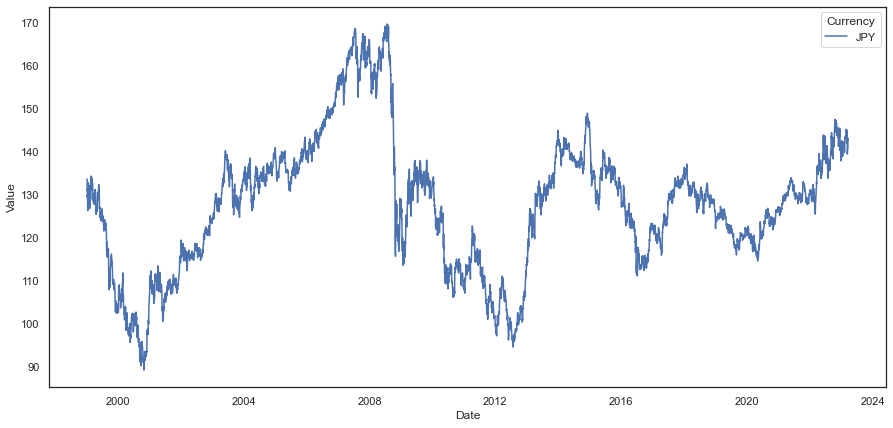

In [20]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Value", hue="Currency", palette='deep', data=df5_melted_JPY)
plt.show()

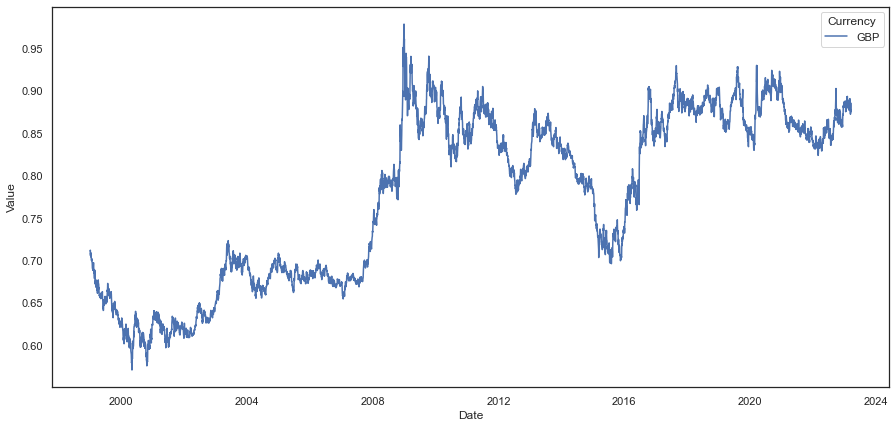

In [21]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Value", hue="Currency", palette='deep', data=df5_melted_GBP)
plt.show()

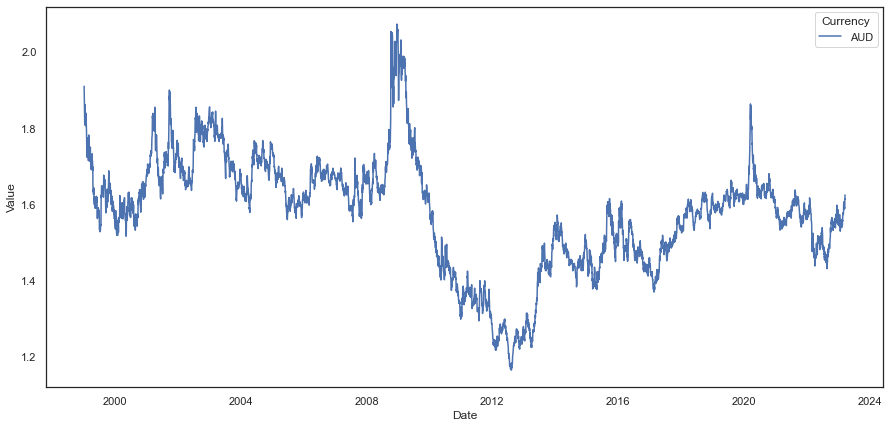

In [22]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Value", hue="Currency", palette='deep', data=df5_melted_AUD)
plt.show()

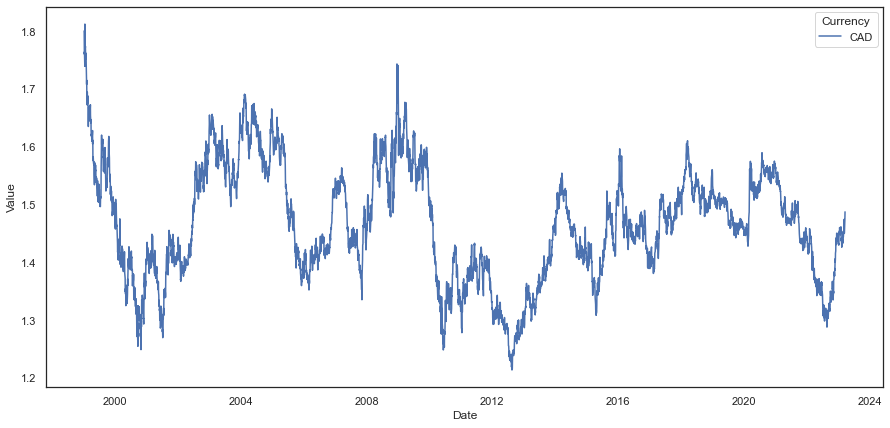

In [23]:
sns.set_style("white")
plt.figure(figsize=(15,7))
sns.lineplot(x="Date", y="Value", hue="Currency",palette='deep', data=df5_melted_CAD)
plt.show()